General Election to Parliamentary Constituencies: Trends & Results June-2024

Majority Party: Bharatiya Janata Party - BJP with 240 seats


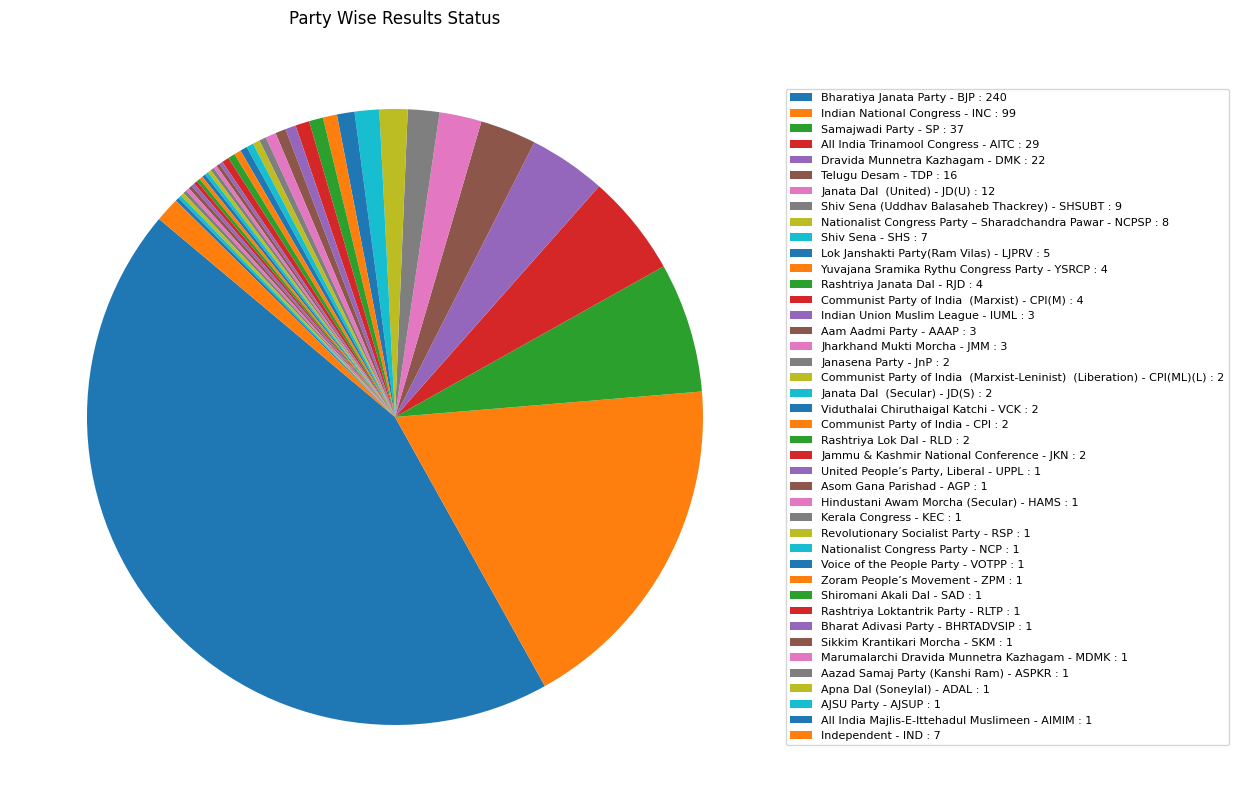

In [70]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm#' 
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
h5_tag = soup.find('div', class_='card-header custom-header').find('h5')
print(h5_tag.text)
print()

table = soup.find('div', class_='rslt-table table-responsive')
if table:
    rows = table.find_all('tr')
    data = []

    headers = [header.text.strip() for header in rows[0].find_all('th')]
    data.append(headers)

    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)
else:
    print("Results table not found on the webpage.")

party_wins = {}
for row in data[1:]:
    if len(row) == 4:
        party = row[0]  
        won_seats = int(row[1]) 
        party_wins[party] = won_seats

df = pd.DataFrame.from_dict(party_wins, orient='index',columns=['Seats Won'])
# print(df.head())

majority_party = df['Seats Won'].idxmax()
majority_seats = df['Seats Won'].max()
print(f"Majority Party: {majority_party} with {majority_seats} seats")

parties = df.index.tolist()
won_seats = df['Seats Won'].tolist()

plt.figure(figsize=(10, 10))
patches, _ = plt.pie(won_seats, labels=None, startangle=140)

labels = [f'{party} : {won_seats[i]}' for i, party in enumerate(parties)]

plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)

plt.title('Party Wise Results Status')

plt.show()


State Wise -> Parliamentary Constituencies: Trends & Results June-2024

State: Andhra Pradesh


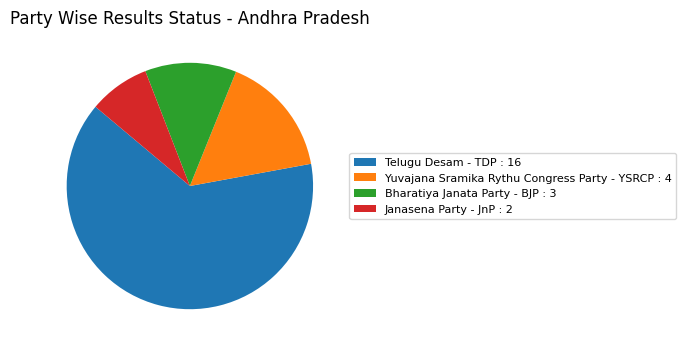

State: Arunachal Pradesh


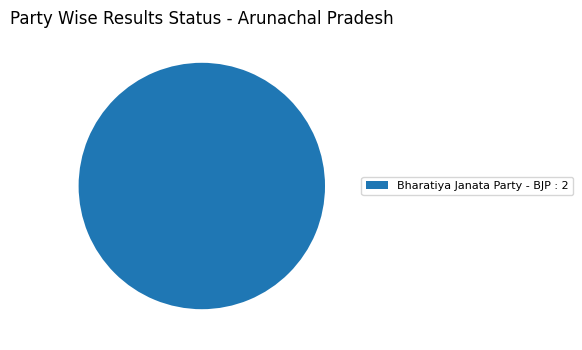

State: Assam


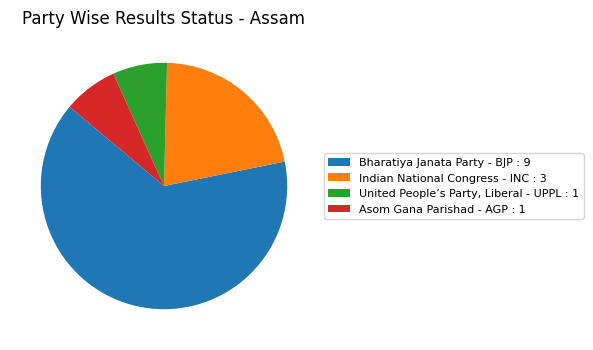

State: Bihar


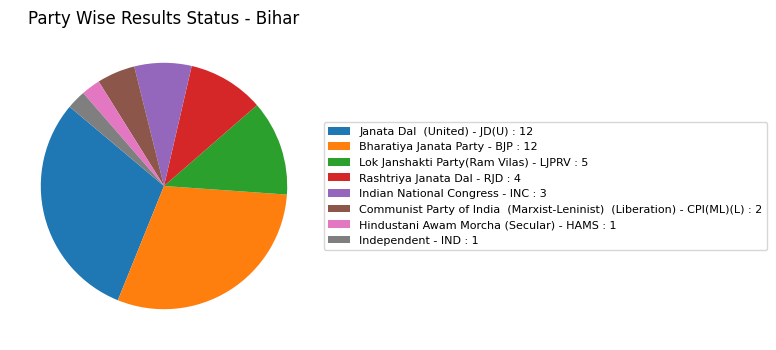

State: Goa


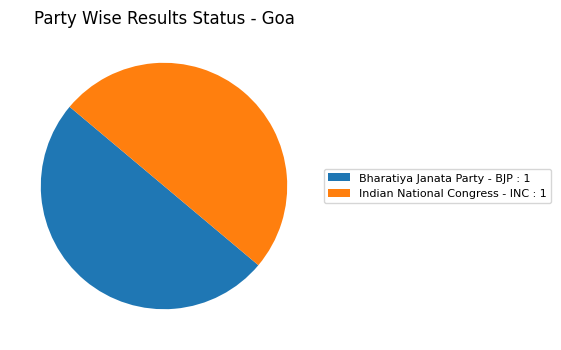

State: Gujarat


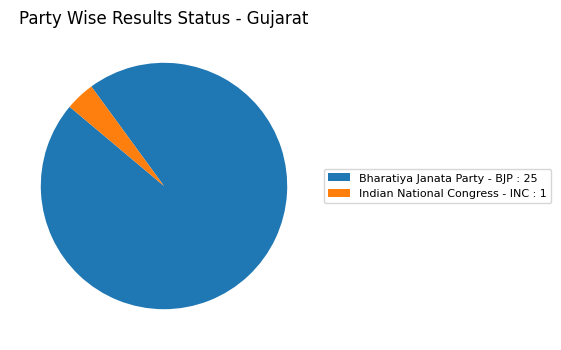

State: Haryana


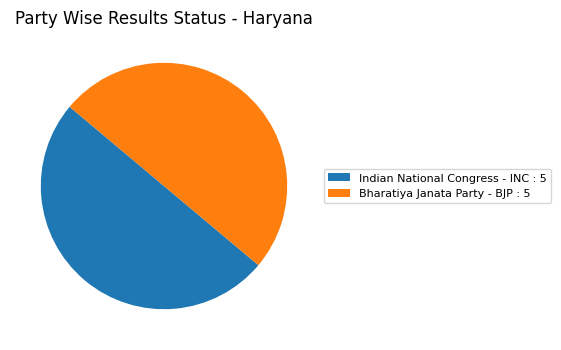

State: Himachal Pradesh


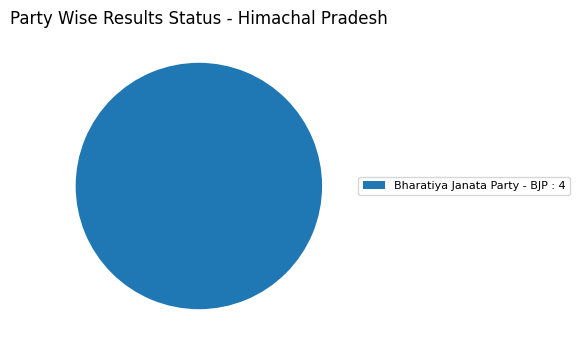

State: Karnataka


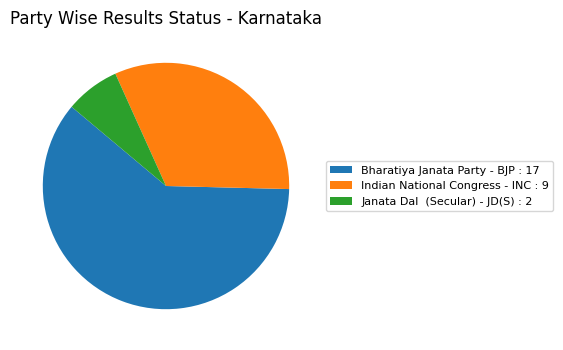

State: Kerala


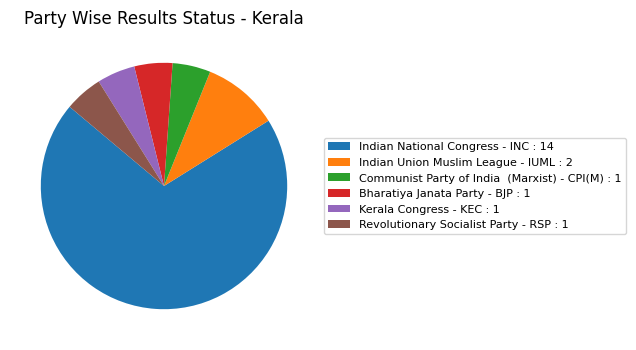

State: Madhya Pradesh


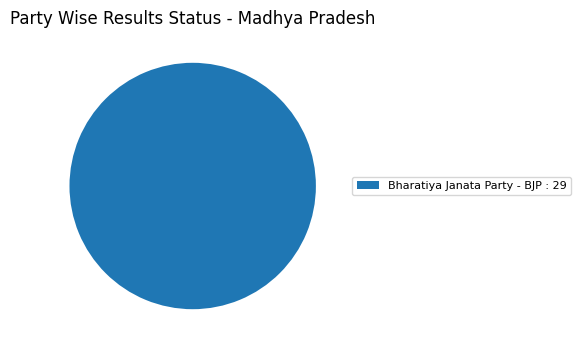

State: Maharashtra


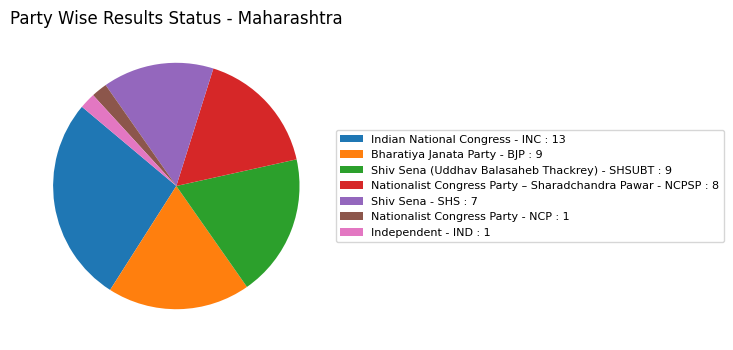

State: Manipur


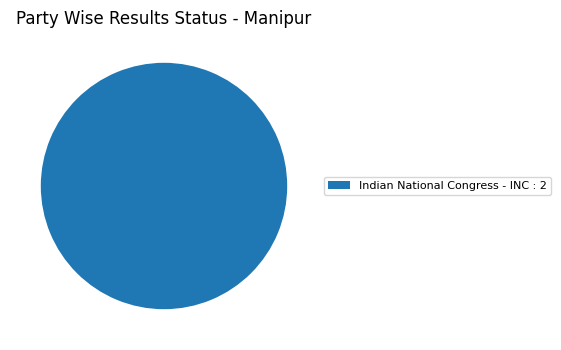

State: Meghalaya


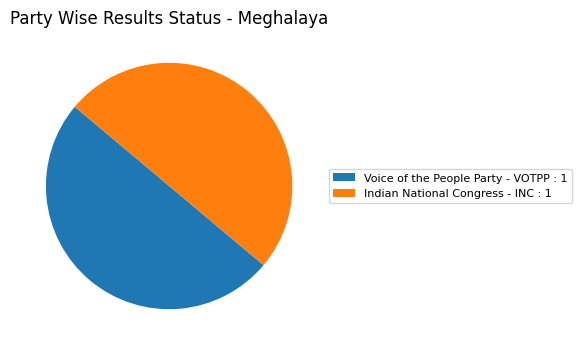

State: Mizoram


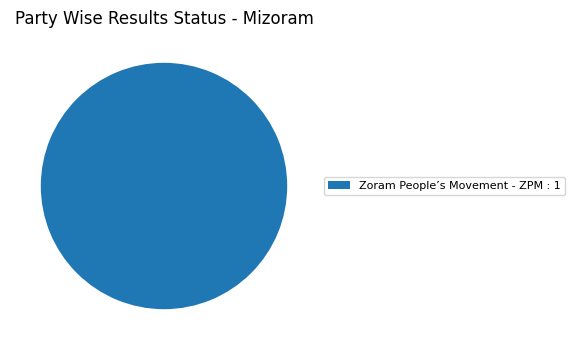

State: Nagaland


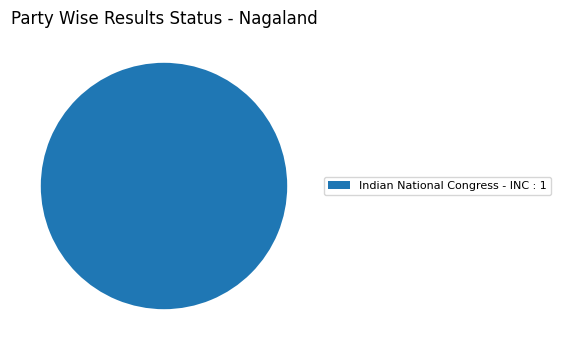

State: Odisha


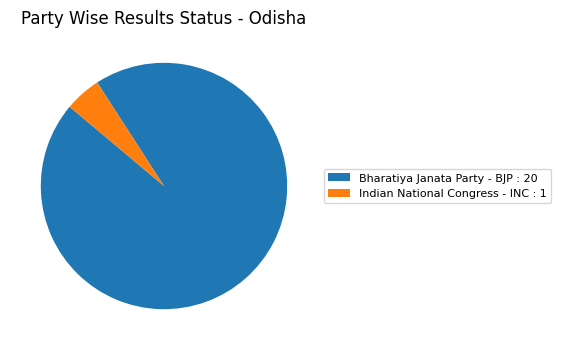

State: Punjab


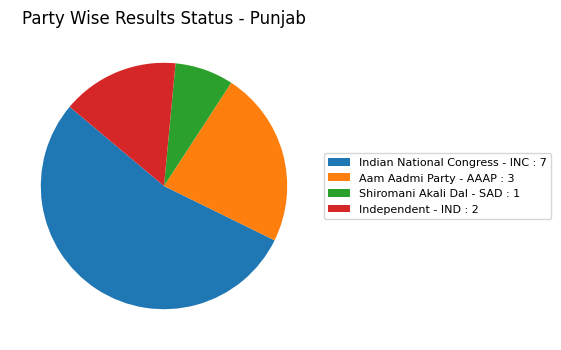

State: Rajasthan


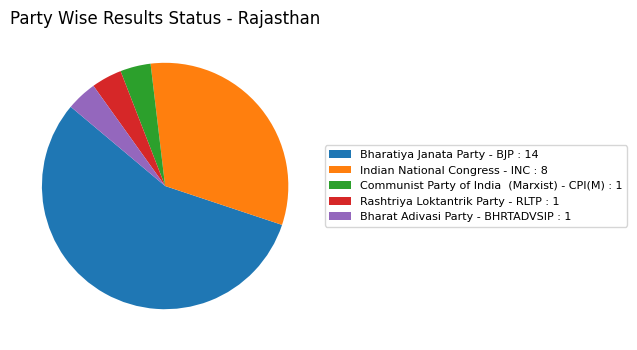

State: Sikkim


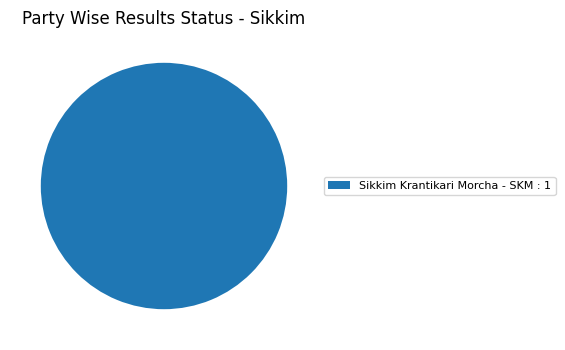

State: Tamil Nadu


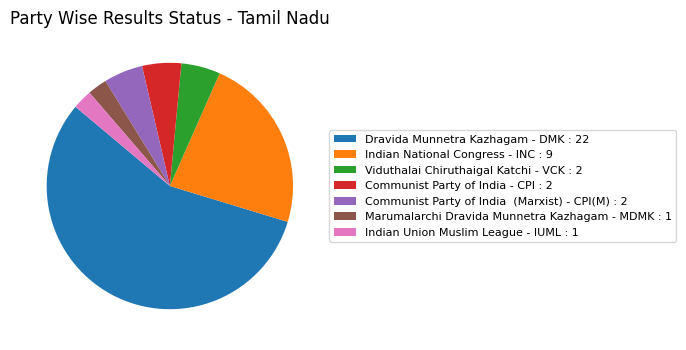

State: Tripura


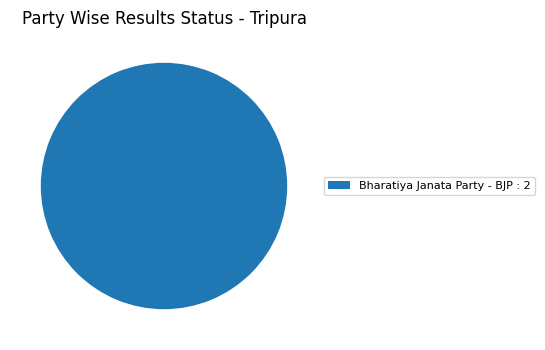

State: Uttar Pradesh


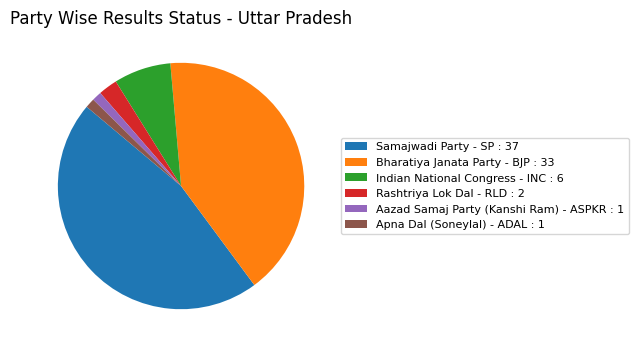

State: West Bengal


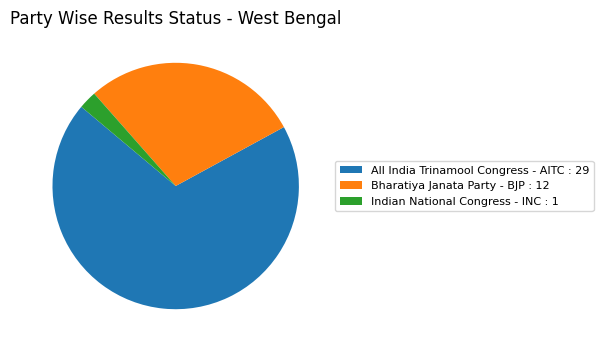

State: Jharkhand


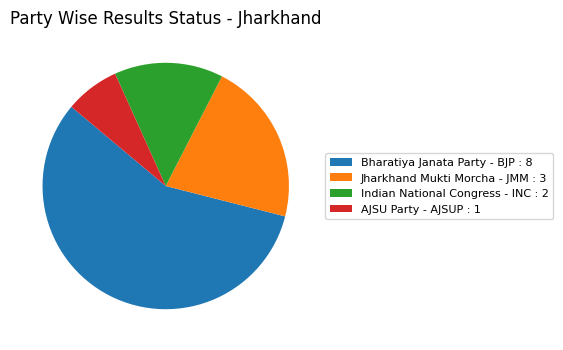

State: Uttarakhand


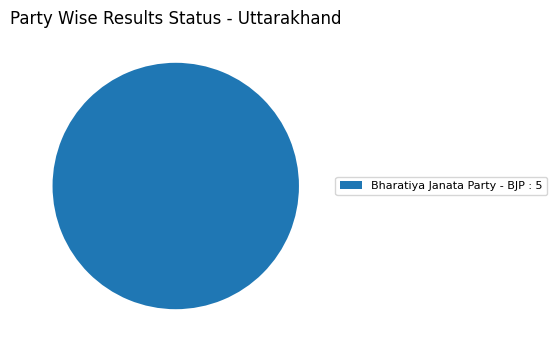

State: Telangana


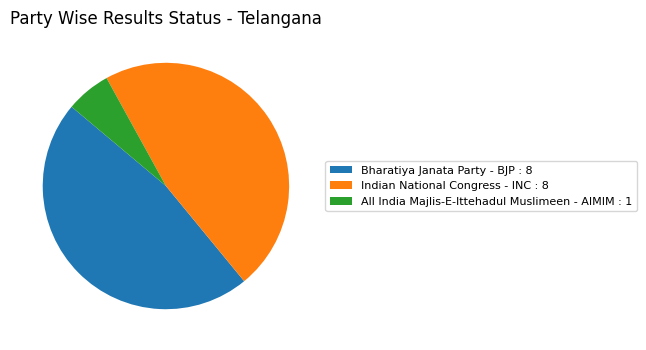

State: Andaman & Nicobar Islands


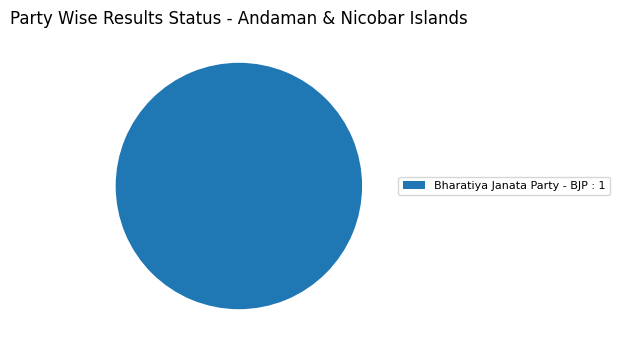

State: Chandigarh


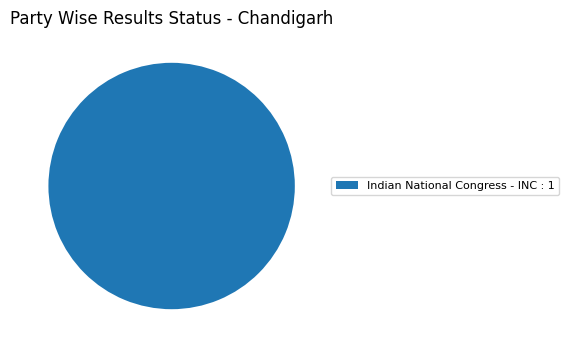

State: Dadra & Nagar Haveli and Daman & Diu


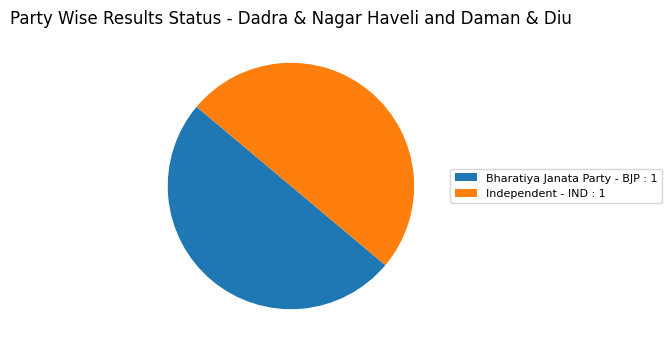

State: NCT OF Delhi


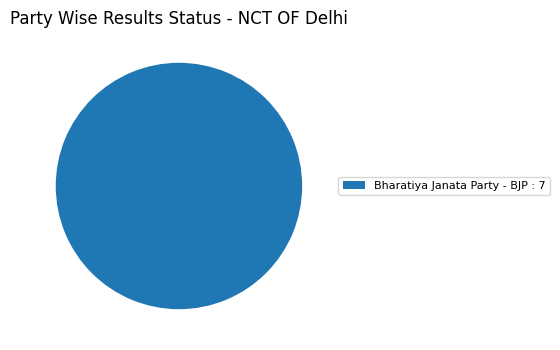

State: Lakshadweep


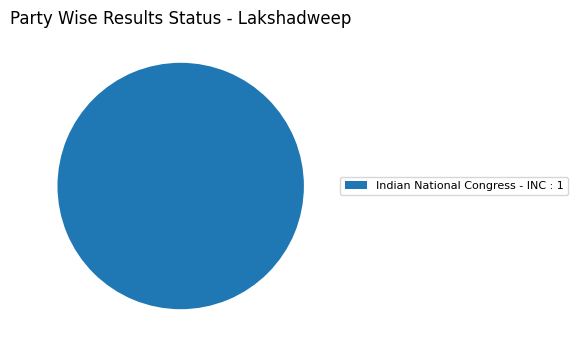

State: Puducherry


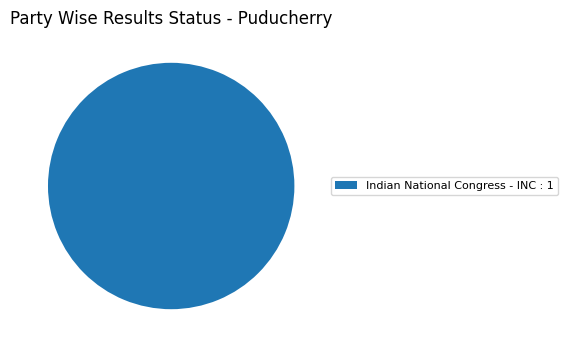

State: Jammu and Kashmir


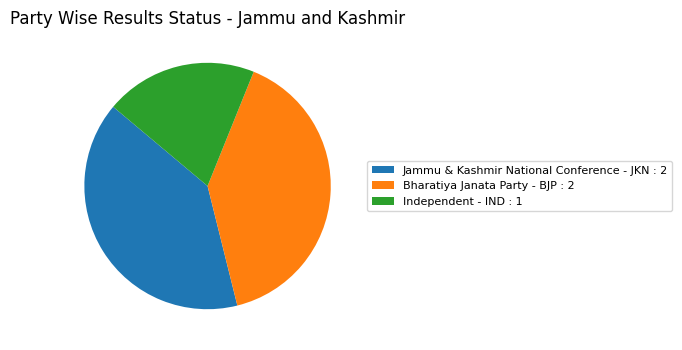

State: Ladakh


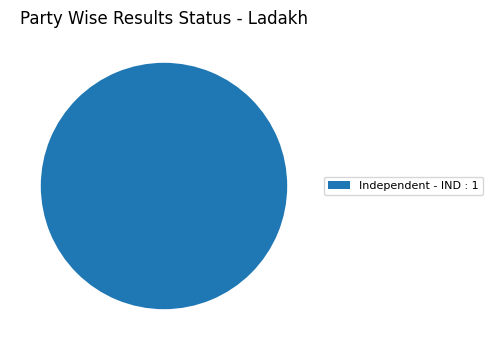

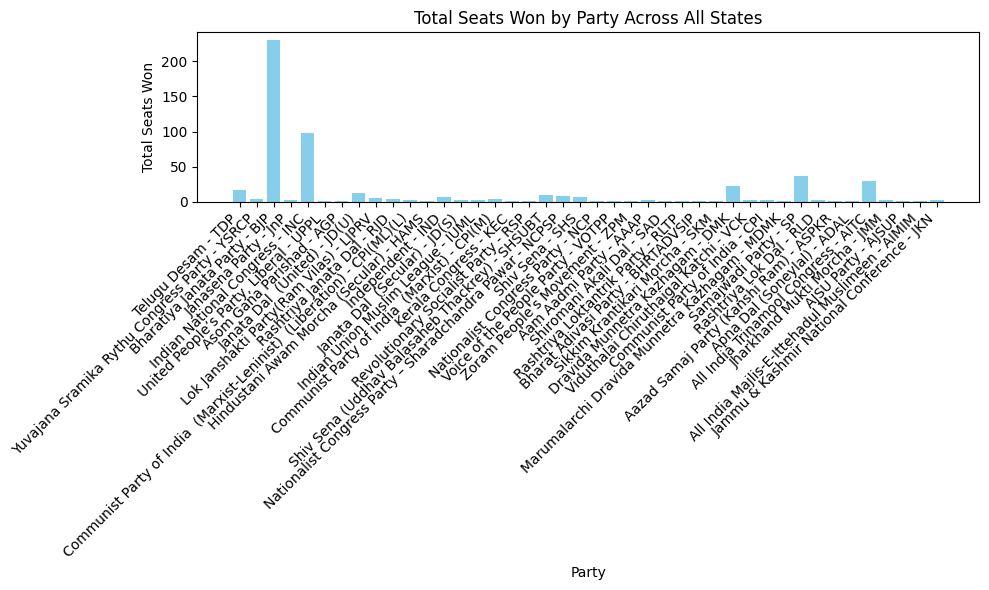

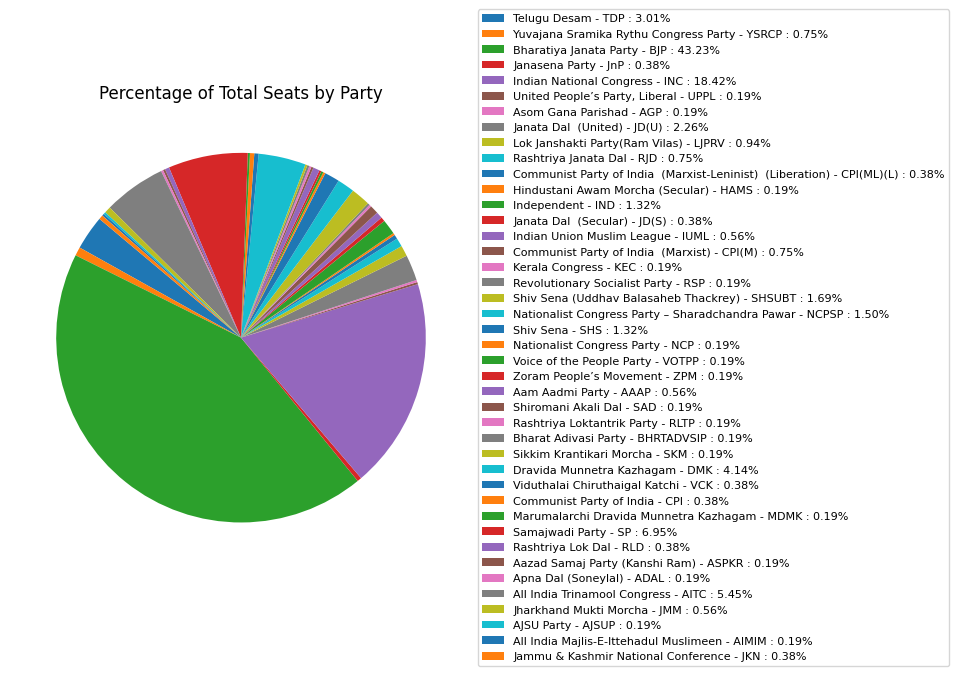


Top 5 Parties by Total Seats Won:
Bharatiya Janata Party - BJP: 230
Indian National Congress - INC: 98
Samajwadi Party - SP: 37
All India Trinamool Congress - AITC: 29
Dravida Munnetra Kazhagam - DMK: 22

State with the Highest Number of Seats Won by a Single Party: Uttar Pradesh - Samajwadi Party - SP: 37 seats

State with the Most Competitive Results: Bihar with a margin of 0 seats between the top two parties


In [85]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

def scrape_parliament_results():
    base_url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-'  # Replace with actual base URL
    state_codes = [
        'S01','S02','S03','S04','S05','S06','S07','S08','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20',
        'S21','S22','S23','S24','S25','S27','S28','S29','U01','U02','U03','U05','U06','U07','U08','U09',
    ]

    total_party_results = {}
    state_party_results = {}

    print("State Wise -> Parliamentary Constituencies: Trends & Results June-2024\n")

    for state_code in state_codes:
        url = f"{base_url}{state_code}.htm"

        response = requests.get(url)
        if response.status_code == 200:
            html_content = response.text
            soup = BeautifulSoup(html_content, 'html.parser')

            state_title_elem = soup.find('div', class_='page-title').find('h2')
            if state_title_elem:
                state_name = state_title_elem.get_text(strip=True).split('(')[0].strip()
                print(f"State: {state_name}")

                party_results = {}
                table_rows = soup.find('table', class_='table').find('tbody').find_all('tr')
                for row in table_rows:
                    columns = row.find_all('td')
                    party_name = columns[0].text.strip()
                    won = int(columns[1].text.strip())
                    party_results[party_name] = won
                    total_party_results[party_name] = total_party_results.get(party_name, 0) + won
                
                state_party_results[state_name] = party_results

                parties = list(party_results.keys())
                won_seats = list(party_results.values())

                plt.figure(figsize=(4, 4))
                patches, _ = plt.pie(won_seats, labels=None, startangle=140)

                labels = [f'{party} : {won_seats[i]}' for i, party in enumerate(parties)]

                plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
                plt.title(f'Party Wise Results Status - {state_name}')
                plt.show()

            else:
                print(f"State name not found for {state_code}")

        else:
            print(f"Failed to retrieve content from {url}")

            
    parties = list(total_party_results.keys())
    won_seats = list(total_party_results.values())

    plt.figure(figsize=(10, 6))
    plt.bar(parties, won_seats, color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Total Seats Won')
    plt.title('Total Seats Won by Party Across All States')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    total_seats = sum(won_seats)
    party_percentages = {party: (seats / total_seats) * 100 for party, seats in total_party_results.items()}


    plt.figure(figsize=(10, 6))
    patches, _ = plt.pie(won_seats, labels=None, startangle=140)

    labels = [f'{party} : {party_percentages[party]:.2f}%' for party in parties]

    plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.title('Percentage of Total Seats by Party')
    plt.show()

    # Summary Insights
    # Top 5 Parties by Total Seats Won
    top_5_parties = sorted(total_party_results.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nTop 5 Parties by Total Seats Won:")
    for party, seats in top_5_parties:
        print(f"{party}: {seats}")

    # State with the Highest Number of Seats Won by a Single Party
    state_max_seats = {}
    for state, results in state_party_results.items():
        max_party = max(results, key=results.get)
        max_seats = results[max_party]
        state_max_seats[state] = (max_party, max_seats)
    
    highest_seats_state = max(state_max_seats.items(), key=lambda x: x[1][1])
    print(f"\nState with the Highest Number of Seats Won by a Single Party: {highest_seats_state[0]} - {highest_seats_state[1][0]}: {highest_seats_state[1][1]} seats")

    # State with the Most Competitive Results
    competitive_state = None
    smallest_margin = float('inf')
    for state, results in state_party_results.items():
        sorted_results = sorted(results.values(), reverse=True)
        if len(sorted_results) > 1:
            margin = sorted_results[0] - sorted_results[1]
            if margin < smallest_margin:
                smallest_margin = margin
                competitive_state = state

    print(f"\nState with the Most Competitive Results: {competitive_state} with a margin of {smallest_margin} seats between the top two parties")

scrape_parliament_results()


General Election to Assembly Constituencies: Trends & Results June-2024

Summary Insights for Andhra Pradesh

1. Total Seats Won by Each Party:
Party
Telugu Desam - TDP                               135
Janasena Party - JnP                              21
Yuvajana Sramika Rythu Congress Party - YSRCP     11
Bharatiya Janata Party - BJP                       8
Name: Seats, dtype: int64

2. Top 5 Parties by Total Seats Won:
Party
Telugu Desam - TDP                               135
Janasena Party - JnP                              21
Yuvajana Sramika Rythu Congress Party - YSRCP     11
Bharatiya Janata Party - BJP                       8
Name: Seats, dtype: int64

3. Party with the Highest Number of Seats:
Telugu Desam - TDP: 135 seats

4. Percentage of Seats Won by Each Party:
Party
Telugu Desam - TDP                               77.142857
Janasena Party - JnP                             12.000000
Yuvajana Sramika Rythu Congress Party - YSRCP     6.285714
Bharatiya Janata Party - BJP  

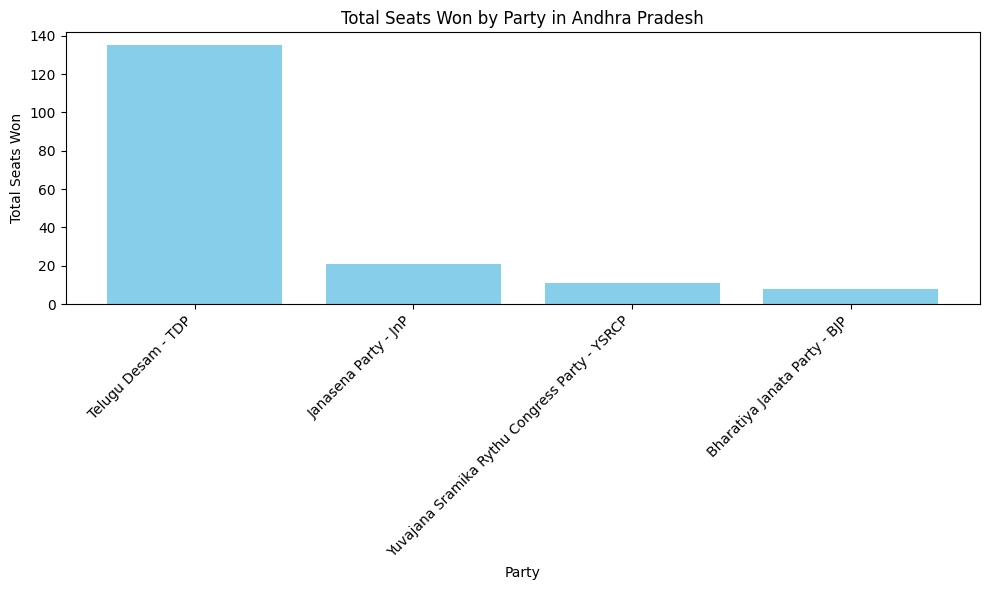

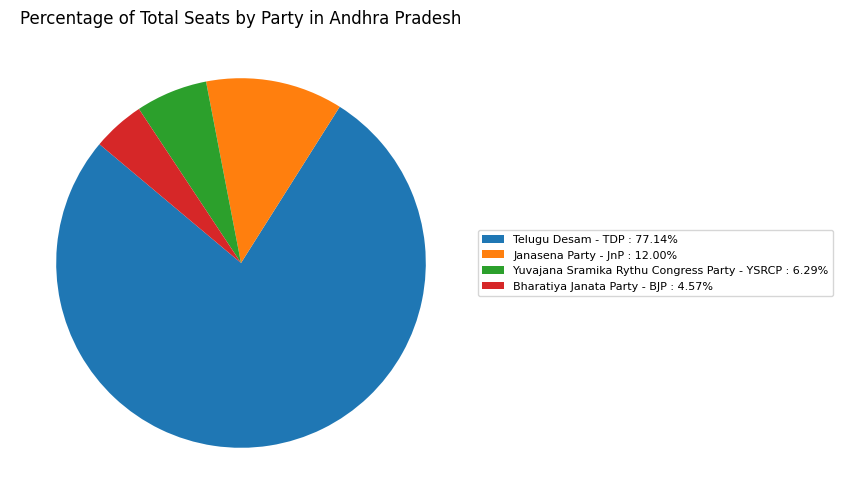

Summary Insights for Odisha

1. Total Seats Won by Each Party:
Party
Bharatiya Janata Party - BJP                    78
Biju Janata Dal - BJD                           51
Indian National Congress - INC                  14
Independent - IND                                3
Communist Party of India  (Marxist) - CPI(M)     1
Name: Seats, dtype: int64

2. Top 5 Parties by Total Seats Won:
Party
Bharatiya Janata Party - BJP                    78
Biju Janata Dal - BJD                           51
Indian National Congress - INC                  14
Independent - IND                                3
Communist Party of India  (Marxist) - CPI(M)     1
Name: Seats, dtype: int64

3. Party with the Highest Number of Seats:
Bharatiya Janata Party - BJP: 78 seats

4. Percentage of Seats Won by Each Party:
Party
Bharatiya Janata Party - BJP                    53.061224
Biju Janata Dal - BJD                           34.693878
Indian National Congress - INC                   9.523810
Independent - IND  

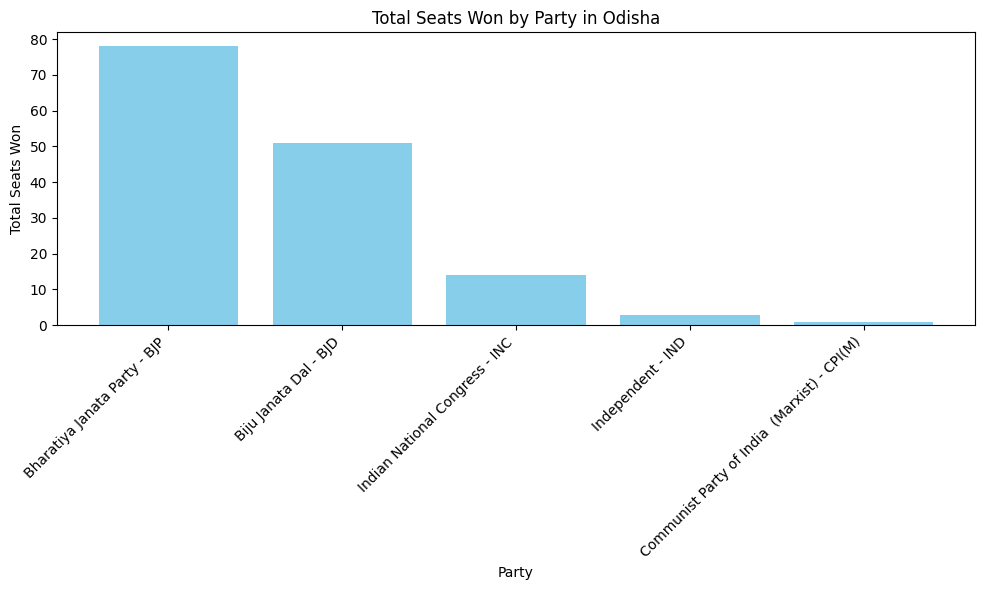

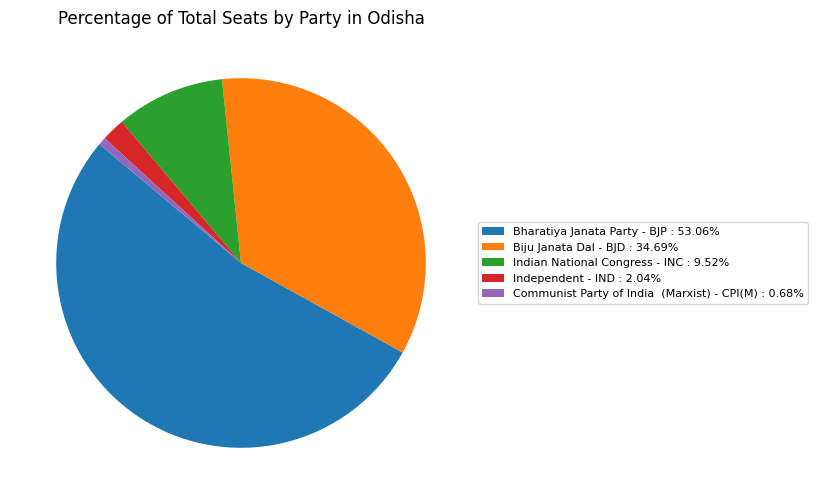

In [90]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

base_url = 'https://results.eci.gov.in/AcResultGenJune2024/'

state_urls = [
    'partywiseresult-S01.htm',  # Andhra Pradesh
    'partywiseresult-S18.htm',  # Odisha
]

def fetch_state_results(state_url):
    url = base_url + state_url
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve content from {url}")
        return None

    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    state_title_elem = soup.find('div', class_='page-title').find('h2')
    if not state_title_elem:
        print(f"State name not found in {state_url}")
        return None

    state_name = state_title_elem.get_text(strip=True).split('(')[0].strip()

    party_results = []
    table_rows = soup.find('table', class_='table').find('tbody').find_all('tr')
    for row in table_rows:
        columns = row.find_all('td')
        party_name = columns[0].text.strip()
        won = int(columns[1].text.strip())
        party_results.append({'State': state_name, 'Party': party_name, 'Seats': won})

    return party_results

def generate_insights(state_results):
    df = pd.DataFrame(state_results)

    print(f"Summary Insights for {df['State'].iloc[0]}\n")
    
    print("1. Total Seats Won by Each Party:")
    total_seats_by_party = df.groupby('Party')['Seats'].sum().sort_values(ascending=False)
    print(total_seats_by_party)

    print("\n2. Top 5 Parties by Total Seats Won:")
    top_5_parties = total_seats_by_party.head(5)
    print(top_5_parties)

    print("\n3. Party with the Highest Number of Seats:")
    highest_seats_party = total_seats_by_party.idxmax()
    highest_seats = total_seats_by_party.max()
    print(f"{highest_seats_party}: {highest_seats} seats")

    print("\n4. Percentage of Seats Won by Each Party:")
    total_seats = df['Seats'].sum()
    party_percentages = (total_seats_by_party / total_seats) * 100
    print(party_percentages)

    plt.figure(figsize=(10, 6))
    plt.bar(total_seats_by_party.index, total_seats_by_party.values, color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Total Seats Won')
    plt.title(f'Total Seats Won by Party in {df["State"].iloc[0]}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    patches, _ = plt.pie(total_seats_by_party.values, labels=None, startangle=140)
    labels = [f'{party} : {party_percentages[party]:.2f}%' for party in total_seats_by_party.index]
    plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.title(f'Percentage of Total Seats by Party in {df["State"].iloc[0]}')
    plt.show()

print("General Election to Assembly Constituencies: Trends & Results June-2024")
print()
for url in state_urls:
    state_results = fetch_state_results(url)
    if state_results:
        generate_insights(state_results)


General Election to Assembly Constituencies: Trends & Results June-2024

Summary Insights for Arunachal Pradesh

1. Total Seats Won by Each Party:
Party
Bharatiya Janata Party - BJP         46
National People's Party - NPEP        5
Independent - IND                     3
Nationalist Congress Party - NCP      3
People's Party of Arunachal - PPA     2
Indian National Congress - INC        1
Name: Seats, dtype: int64

2. Top 5 Parties by Total Seats Won:
Party
Bharatiya Janata Party - BJP         46
National People's Party - NPEP        5
Independent - IND                     3
Nationalist Congress Party - NCP      3
People's Party of Arunachal - PPA     2
Name: Seats, dtype: int64

3. Party with the Highest Number of Seats:
Bharatiya Janata Party - BJP: 46 seats

4. Percentage of Seats Won by Each Party:
Party
Bharatiya Janata Party - BJP         76.666667
National People's Party - NPEP        8.333333
Independent - IND                     5.000000
Nationalist Congress Party - NCP      

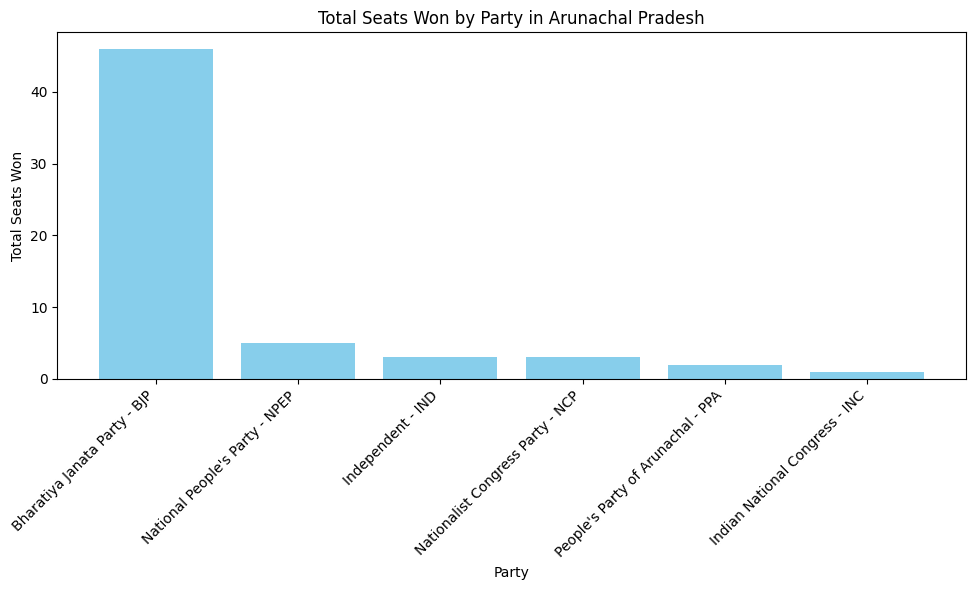

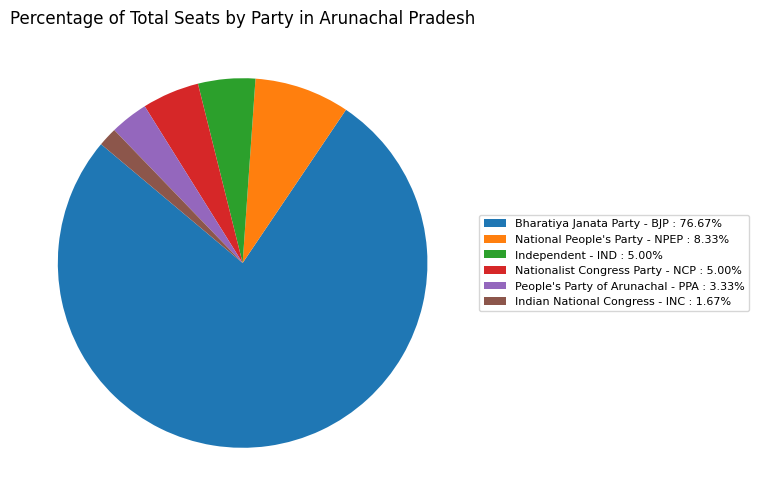

Summary Insights for Sikkim

1. Total Seats Won by Each Party:
Party
Sikkim Krantikari Morcha - SKM    31
Sikkim Democratic Front - SDF      1
Name: Seats, dtype: int64

2. Top 5 Parties by Total Seats Won:
Party
Sikkim Krantikari Morcha - SKM    31
Sikkim Democratic Front - SDF      1
Name: Seats, dtype: int64

3. Party with the Highest Number of Seats:
Sikkim Krantikari Morcha - SKM: 31 seats

4. Percentage of Seats Won by Each Party:
Party
Sikkim Krantikari Morcha - SKM    96.875
Sikkim Democratic Front - SDF      3.125
Name: Seats, dtype: float64


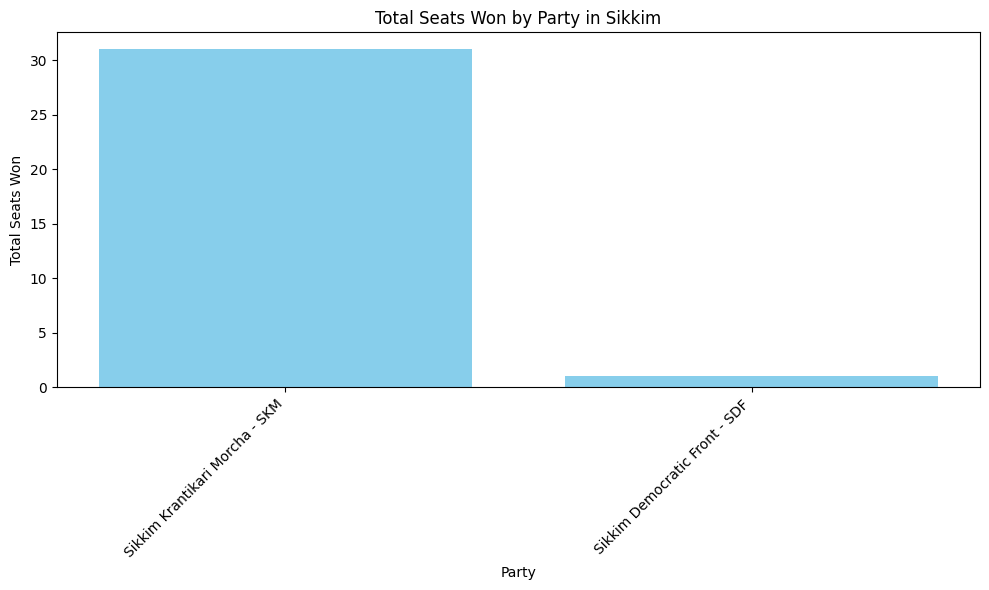

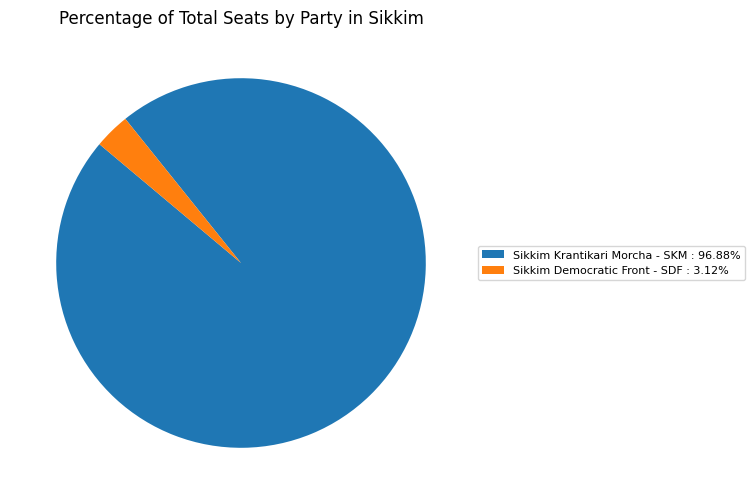

In [91]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

base_url = 'https://results.eci.gov.in/AcResultGen2ndJune2024/'

state_urls = [
    'partywiseresult-S02.htm', #Arunachal Pradesh
    'partywiseresult-S21.htm', #Sikkim
]

def fetch_state_results(state_url):
    url = base_url + state_url
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve content from {url}")
        return None

    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    state_title_elem = soup.find('div', class_='page-title').find('h2')
    if not state_title_elem:
        print(f"State name not found in {state_url}")
        return None

    state_name = state_title_elem.get_text(strip=True).split('(')[0].strip()

    party_results = []
    table_rows = soup.find('table', class_='table').find('tbody').find_all('tr')
    for row in table_rows:
        columns = row.find_all('td')
        party_name = columns[0].text.strip()
        won = int(columns[1].text.strip())
        party_results.append({'State': state_name, 'Party': party_name, 'Seats': won})

    return party_results

def generate_insights(state_results):
    df = pd.DataFrame(state_results)

    print(f"Summary Insights for {df['State'].iloc[0]}\n")
    
    print("1. Total Seats Won by Each Party:")
    total_seats_by_party = df.groupby('Party')['Seats'].sum().sort_values(ascending=False)
    print(total_seats_by_party)

    print("\n2. Top 5 Parties by Total Seats Won:")
    top_5_parties = total_seats_by_party.head(5)
    print(top_5_parties)

    print("\n3. Party with the Highest Number of Seats:")
    highest_seats_party = total_seats_by_party.idxmax()
    highest_seats = total_seats_by_party.max()
    print(f"{highest_seats_party}: {highest_seats} seats")

    print("\n4. Percentage of Seats Won by Each Party:")
    total_seats = df['Seats'].sum()
    party_percentages = (total_seats_by_party / total_seats) * 100
    print(party_percentages)

    plt.figure(figsize=(10, 6))
    plt.bar(total_seats_by_party.index, total_seats_by_party.values, color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Total Seats Won')
    plt.title(f'Total Seats Won by Party in {df["State"].iloc[0]}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    patches, _ = plt.pie(total_seats_by_party.values, labels=None, startangle=140)
    labels = [f'{party} : {party_percentages[party]:.2f}%' for party in total_seats_by_party.index]
    plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.title(f'Percentage of Total Seats by Party in {df["State"].iloc[0]}')
    plt.show()

print("General Election to Assembly Constituencies: Trends & Results June-2024")
print()
for url in state_urls:
    state_results = fetch_state_results(url)
    if state_results:
        generate_insights(state_results)


Summary Insights for Bye Elections June-2024

1. Total Seats Won by Each Party:
Bharatiya Janata Party                                        11
Indian National Congress                                       7
Samajwadi Party                                                2
All India Trinamool Congress                                   2
Communist Party of India  (Marxist-Leninist)  (Liberation)     1
Jharkhand Mukti Morcha                                         1
Bharat Adivasi Party                                           1
Name: Party, dtype: int64

2. Top 5 Parties by Total Seats Won:
Bharatiya Janata Party                                        11
Indian National Congress                                       7
Samajwadi Party                                                2
All India Trinamool Congress                                   2
Communist Party of India  (Marxist-Leninist)  (Liberation)     1
Name: Party, dtype: int64


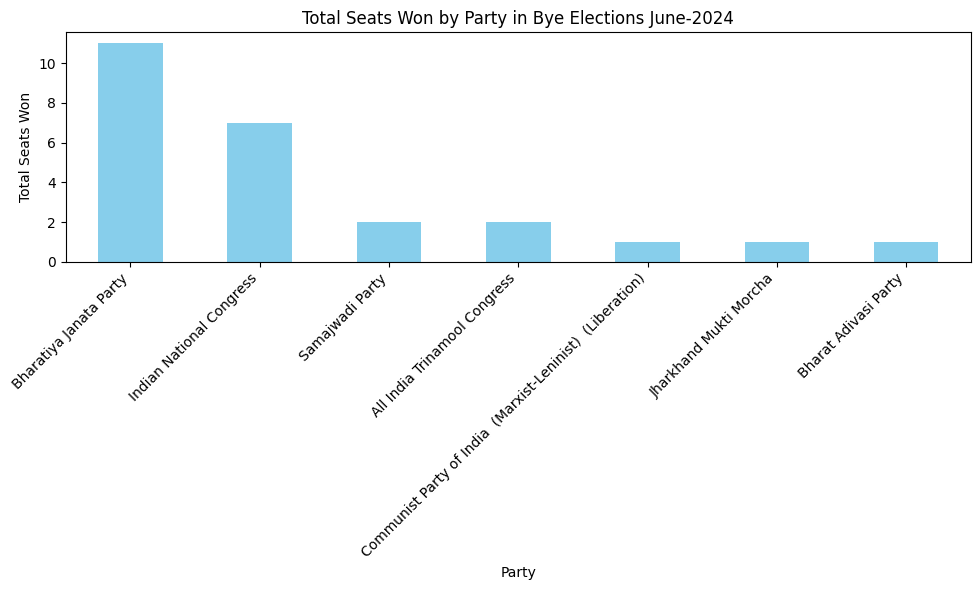

In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def fetch_bye_election_results():
    url = 'https://results.eci.gov.in/AcResultByeJune2024/'
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve content from {url}")
        return None

    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    bye_election_results = []
    boxes = soup.find_all('div', class_='const-box')
    for box in boxes:
        const_name = box.find('h3').text.strip()
        state_name = box.find('h4').text.strip()
        winner_name = box.find('h5').text.strip()
        party_name = box.find('h6').text.strip()

        bye_election_results.append({
            'Constituency': const_name,
            'State': state_name,
            'Winner': winner_name,
            'Party': party_name
        })

    return bye_election_results

def generate_bye_election_insights(results):
    df = pd.DataFrame(results)

    print("Summary Insights for Bye Elections June-2024\n")

    print("Total Seats Won by Each Party:")
    total_seats_by_party = df['Party'].value_counts().sort_values(ascending=False)
    print(total_seats_by_party)

    plt.figure(figsize=(10, 6))
    total_seats_by_party.plot(kind='bar', color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Total Seats Won')
    plt.title('Total Seats Won by Party in Bye Elections June-2024')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

bye_election_results = fetch_bye_election_results()

if bye_election_results:
    generate_bye_election_insights(bye_election_results)


Summary of Tasks Completed:
1) Web Scraping Setup:

Implemented Python scripts to scrape election result data from HTML pages using requests and BeautifulSoup.
Structured functions to parse specific elements such as state names, party-wise results, and constituency details.
2) Parliamentary Results Analysis:

Created a function to scrape and analyze parliamentary election results for multiple states.
Extracted data on party-wise seats won and visualized results using pie charts for each state.
3) State-Wise Insights Generated:

Andhra Pradesh and Odisha: Analyzed and displayed parliamentary election results individually for each state.
Key Insights:
Visualized the distribution of seats won by different political parties in each state.
Summarized the top political parties based on the number of seats won.
Provided a detailed breakdown of election outcomes across constituencies.
4) Bye-Election Results Handling:

Developed functionality to fetch and process bye-election results for various constituencies.
Extracted details such as constituency name, state, winning candidate, and party affiliation from the HTML structure.
Generated insights on the total seats won by each party and identified the top 5 parties based on seat count.
5) Insights and Visualizations:

Created bar charts to visualize the distribution of seats won by political parties in bye-elections.
Summarized the total number of seats won by each party and highlighted the top-performing parties.
Presented summary insights to facilitate quick understanding and decision-making regarding election outcomes.